In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
products = pd.read_csv(r"C:\Users\abuob\Downloads\Products.csv")
customers = pd.read_csv(r"C:\Users\abuob\Downloads\Customers.csv")
transactions = pd.read_csv(r"C:\Users\abuob\Downloads\Transactions.csv")

In [3]:
products.head()

,ProductID,ProductName,Category,Price
0,P001,ActiveWear Biography,Books,169.30
1,P002,ActiveWear Smartwatch,Electronics,346.30
2,P003,ComfortLiving Biography,Books,44.12
3,P004,BookWorld Rug,Home Decor,95.69
4,P005,TechPro T-Shirt,Clothing,429.31


In [4]:
customers.head()

,CustomerID,CustomerName,Region,SignupDate
0,C0001,Lawrence Carroll,South America,2022-07-10
1,C0002,Elizabeth Lutz,Asia,2022-02-13
2,C0003,Michael Rivera,South America,2024-03-07
3,C0004,Kathleen Rodriguez,South America,2022-10-09
4,C0005,Laura Weber,Asia,2022-08-15


In [5]:
transactions.head()

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68


In [6]:
products.isnull().sum()

ProductID      0
ProductName    0
Category       0
Price          0
dtype: int64

In [7]:
customers.isnull().sum()

CustomerID      0
CustomerName    0
Region          0
SignupDate      0
dtype: int64

In [8]:
transactions.isnull().sum()

TransactionID      0
CustomerID         0
ProductID          0
TransactionDate    0
Quantity           0
TotalValue         0
Price              0
dtype: int64

In [9]:
merged_data = transactions.merge(customers, on="CustomerID").merge(products, on="ProductID")
merged_data.head()

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price_x,CustomerName,Region,SignupDate,ProductName,Category,Price_y
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68,Andrea Jenkins,Europe,2022-12-03,ComfortLiving Bluetooth Speaker,Electronics,300.68
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68,Brittany Harvey,Asia,2024-09-04,ComfortLiving Bluetooth Speaker,Electronics,300.68
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68,Kathryn Stevens,Europe,2024-04-04,ComfortLiving Bluetooth Speaker,Electronics,300.68
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68,Travis Campbell,South America,2024-04-11,ComfortLiving Bluetooth Speaker,Electronics,300.68
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68,Timothy Perez,Europe,2022-03-15,ComfortLiving Bluetooth Speaker,Electronics,300.68


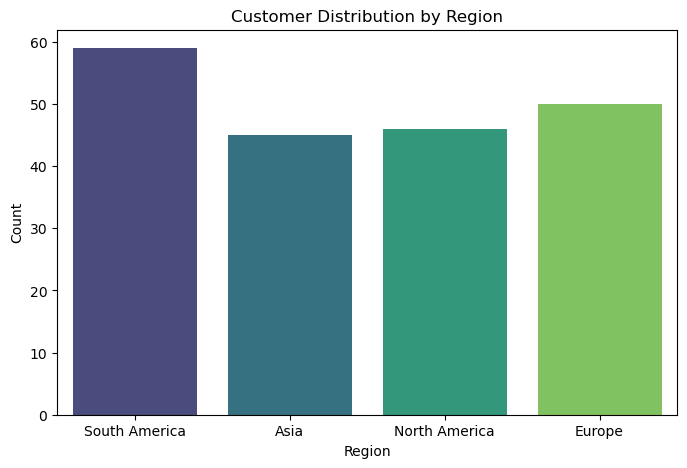

In [10]:
# Distribution of customers by region
plt.figure(figsize=(8, 5))
sns.countplot(data=customers, x="Region", palette="viridis")
plt.title("Customer Distribution by Region")
plt.xlabel("Region")
plt.ylabel("Count")
plt.show()

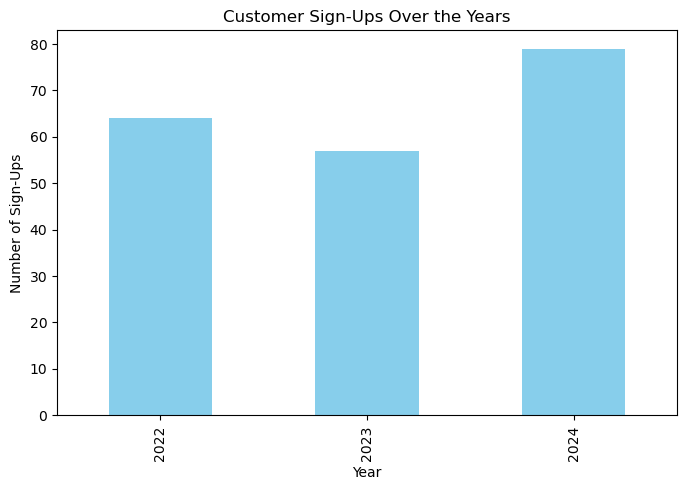

In [11]:
# Signup trends (yearly)
customers["SignUpYear"] = pd.to_datetime(customers["SignupDate"]).dt.year
signup_trends = customers["SignUpYear"].value_counts().sort_index()
plt.figure(figsize=(8, 5))
signup_trends.plot(kind="bar", color="skyblue")
plt.title("Customer Sign-Ups Over the Years")
plt.xlabel("Year")
plt.ylabel("Number of Sign-Ups")
plt.show()


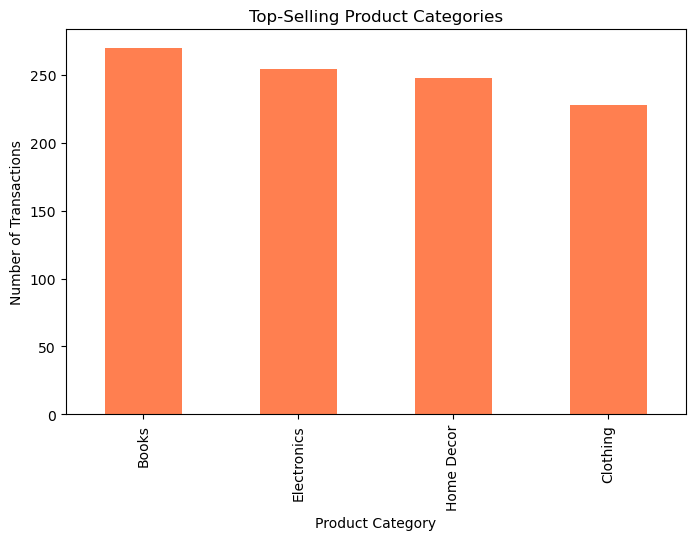

In [12]:
# Top-selling product categories
top_categories = merged_data["Category"].value_counts().head(10)
plt.figure(figsize=(8, 5))
top_categories.plot(kind="bar", color="coral")
plt.title("Top-Selling Product Categories")
plt.xlabel("Product Category")
plt.ylabel("Number of Transactions")
plt.show()

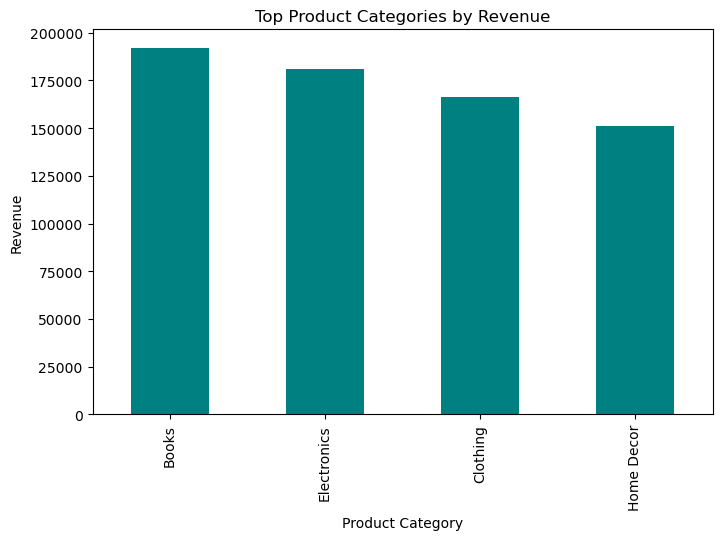

In [13]:
# Revenue contribution by product category
merged_data["Revenue"] = merged_data["Quantity"] * merged_data["Price_x"]
revenue_by_category = merged_data.groupby("Category")["Revenue"].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(8, 5))
revenue_by_category.plot(kind="bar", color="teal")
plt.title("Top Product Categories by Revenue")
plt.xlabel("Product Category")
plt.ylabel("Revenue")
plt.show()

In [14]:
# Average transaction value
avg_transaction_value = merged_data["Revenue"].mean()
print(f"Average Transaction Value: ${avg_transaction_value:.2f}")

Average Transaction Value: $690.00


In [15]:
# Number of transactions per customer
transactions_per_customer = merged_data["CustomerID"].value_counts()
print(f"Average Transactions Per Customer: {transactions_per_customer.mean():.2f}")

Average Transactions Per Customer: 5.03


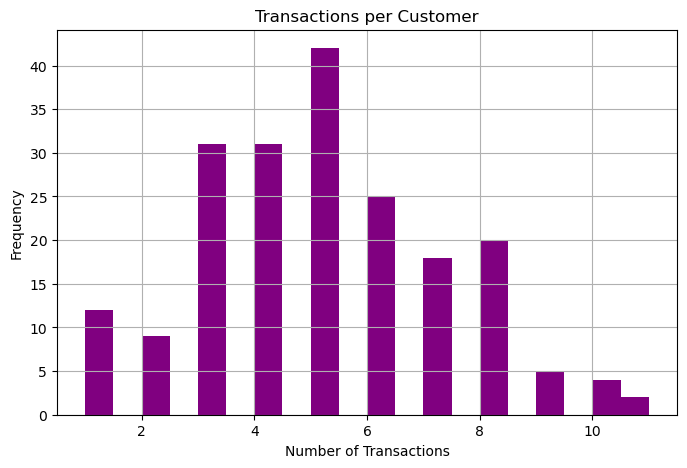

In [16]:
# Visualizing transaction frequency
plt.figure(figsize=(8, 5))
transactions_per_customer.hist(bins=20, color="purple")
plt.title("Transactions per Customer")
plt.xlabel("Number of Transactions")
plt.ylabel("Frequency")
plt.show()

In [17]:
print("\n--- Key Insights ---")
print("1. The region with the highest number of customers is:", customers["Region"].value_counts().idxmax())
print("2. The most popular product category is:", merged_data["Category"].value_counts().idxmax())
print("3. The top revenue-generating category is:", revenue_by_category.idxmax())
print("4. The average transaction value is: ${:.2f}".format(avg_transaction_value))
print("5. On average, each customer makes {:.2f} transactions.".format(transactions_per_customer.mean()))


--- Key Insights ---
1. The region with the highest number of customers is: South America
2. The most popular product category is: Books
3. The top revenue-generating category is: Books
4. The average transaction value is: $690.00
5. On average, each customer makes 5.03 transactions.
